## Project
You will analize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

* Use Pandas to import the data from epa-sea-level.csv.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [4]:
#Answer

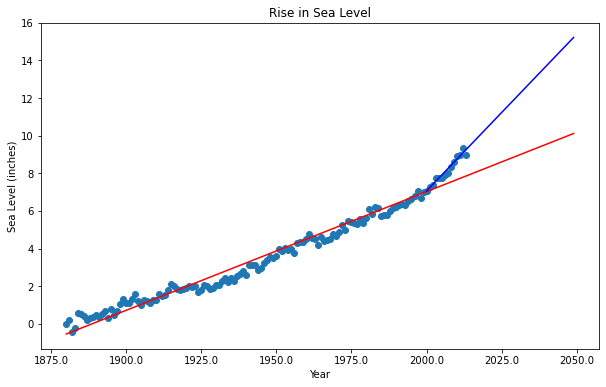

In [6]:
draw_plot()

In [5]:
#Solution

In [1]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x_ticks = []
    x_ticks_labels = []

    for i in range(1850, 2076, 25):
        x_ticks.append(round(float(i), 1))
    for i in x_ticks:
        x_ticks_labels.append(str(i))
    
    ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
    ax.set_xbound(lower=1850, upper=2050)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks_labels)

    # Create first line of best fit
    #According to the problem, we have to plot a best line of fit up to year 2050.
    #Using scypy.stats.lingress gives us 5 values: slope of regression, intercept of the regression line,
    #correlation coefficient, p-value, and standard error of estimated gradient.
    #To plot the best line, we need the slope and the intercept of the regression line.

    slope, intercept, rvalue, pvalue, std_error = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

    #We can now delete the corr_coeff, p-value, and std_error because we are only going to use slope and regression_intercept.

    del rvalue, pvalue, std_error

    x_values = list((range(1880, 2050, 1)))
    y_values = []

    for values in x_values:
        y_values.append(intercept + values*slope)
    
    ax.plot(x_values, y_values, color = 'red')


    # Create second line of best fit
    #For this second line of best fit, we need the linear regression of values from year 2000 up to year 2050.
    #We need to slice our data so that data from 2000 onwards are the ones that we are analyzing.

    df_from_2000_up = df[df['Year'] >= 2000].copy()

    #Then we proceed from what we did from the first best line of fit
    slope, intercept, rvalue, pvalue, std_error = linregress(df_from_2000_up['Year'], df_from_2000_up['CSIRO Adjusted Sea Level'])

    del rvalue, pvalue, std_error

    x_values = list((range(2000, 2050, 1)))
    y_values = []

    for values in x_values:
        y_values.append(intercept + values*slope)
    
    ax.plot(x_values, y_values, color = 'blue')

    # Add labels and title

    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')    
    ax.set_title('Rise in Sea Level')
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()